## Learning Time Evolution of Stochastic Linear Oscillator

We use time-appended normalizing flow (tNF) in 1d to attempt to fit the density from discrete observations. In particular, after the density is fitted over discrete time, we investigate interpolation and extrapolation properties. 

Date: 06/10/2023

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
from temporal_normalizing_flows.neural_flow import neural_flow
from temporal_normalizing_flows.latent_distributions import gaussian
from temporal_normalizing_flows.preprocessing import prepare_data

In [2]:
# load data
data_path = "../data/LinearOscillator/OU_noise_energy.mat"
data = scipy.io.loadmat(data_path)

/Users/honglizhaobob/opt/anaconda3/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [18]:
x_sample = np.linspace(0.0, 4500.0, 1000)
time = data["tspan"][0]
t_sample = np.linspace(time[0], time[-1], 100)
# subsample position in time
position = data["v_data"]
position2 = position[:, 0:-1:50].T
dataset = prepare_data(position2, t_sample, x_sample, t_sample)

In [19]:
flow = neural_flow(gaussian)
flow.train(dataset, 5000)

/Users/honglizhaobob/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


0 61260.86328125
1 53827.890625
2 47350.4609375
3 41674.95703125
4 36689.83203125
5 32309.958984375
6 28464.86328125
7 25093.1875
8 22140.16796875
9 19556.546875
10 17298.115234375
11 15325.3486328125
12 13603.044921875
13 12099.93359375
14 10788.3115234375
15 9643.75390625
16 8644.8330078125
17 7772.8935546875
18 7011.658203125
19 6345.58837890625
20 5759.02001953125
21 5241.86279296875
22 4786.12451171875
23 4384.07275390625
24 4028.6962890625
25 3713.853759765625
26 3434.241943359375
27 3185.29541015625
28 2963.095458984375
29 2764.263916015625
30 2585.89453125
31 2425.47705078125
32 2280.8408203125
33 2150.10888671875
34 2031.6494140625
35 1924.05029296875
36 1826.0782470703125
37 1736.6605224609375
38 1654.8575439453125
39 1579.8487548828125
40 1510.9141845703125
41 1447.4207763671875
42 1388.8114013671875
43 1334.5948486328125
44 1284.337646484375
45 1237.6534423828125
46 1194.2025146484375
47 1153.6817626953125
48 1115.8203125
49 1080.3775634765625
50 1047.139892578125
51 1015.9

380 55.49807357788086
381 55.25833511352539
382 55.02022171020508
383 54.78371810913086
384 54.548828125
385 54.31544494628906
386 54.08368682861328
387 53.85337829589844
388 53.62461471557617
389 53.39739990234375
390 53.171600341796875
391 52.94738006591797
392 52.724613189697266
393 52.503360748291016
394 52.283443450927734
395 52.064979553222656
396 51.84797668457031
397 51.63236618041992
398 51.41822052001953
399 51.20539855957031
400 50.99396514892578
401 50.78395462036133
402 50.57525634765625
403 50.36787033081055
404 50.161865234375
405 49.95721435546875
406 49.753780364990234
407 49.55168533325195
408 49.3509407043457
409 49.151405334472656
410 48.953125
411 48.75621032714844
412 48.56047439575195
413 48.365936279296875
414 48.17271041870117
415 47.980613708496094
416 47.78981399536133
417 47.60017013549805
418 47.411766052246094
419 47.224464416503906
420 47.03834915161133
421 46.853458404541016
422 46.66973114013672
423 46.48703384399414
424 46.3055534362793
425 46.12517929

747 19.010629653930664
748 18.975337982177734
749 18.940174102783203
750 18.905166625976562
751 18.870271682739258
752 18.835525512695312
753 18.800926208496094
754 18.766481399536133
755 18.73215675354004
756 18.69800567626953
757 18.66394805908203
758 18.630062103271484
759 18.596302032470703
760 18.562679290771484
761 18.52918815612793
762 18.495838165283203
763 18.462608337402344
764 18.42951202392578
765 18.396556854248047
766 18.363744735717773
767 18.331052780151367
768 18.29847526550293
769 18.266040802001953
770 18.23375129699707
771 18.201587677001953
772 18.169536590576172
773 18.137617111206055
774 18.105844497680664
775 18.07416534423828
776 18.04262351989746
777 18.011205673217773
778 17.979930877685547
779 17.948772430419922
780 17.917741775512695
781 17.886821746826172
782 17.85603904724121
783 17.825363159179688
784 17.79481315612793
785 17.76436424255371
786 17.734066009521484
787 17.703874588012695
788 17.67380142211914
789 17.64385414123535
790 17.6140079498291
791 

1103 12.019522666931152
1104 12.008988380432129
1105 11.998496055603027
1106 11.988037109375
1107 11.977579116821289
1108 11.967178344726562
1109 11.95678997039795
1110 11.946447372436523
1111 11.936117172241211
1112 11.925834655761719
1113 11.91556167602539
1114 11.905329704284668
1115 11.895129203796387
1116 11.884943962097168
1117 11.87480354309082
1118 11.864677429199219
1119 11.854584693908691
1120 11.84453010559082
1121 11.834493637084961
1122 11.824488639831543
1123 11.814507484436035
1124 11.804563522338867
1125 11.794638633728027
1126 11.784750938415527
1127 11.774887084960938
1128 11.765046119689941
1129 11.7552490234375
1130 11.745471000671387
1131 11.735721588134766
1132 11.725990295410156
1133 11.716293334960938
1134 11.706632614135742
1135 11.696990966796875
1136 11.6873779296875
1137 11.6777925491333
1138 11.66823959350586
1139 11.658709526062012
1140 11.649205207824707
1141 11.639742851257324
1142 11.63029956817627
1143 11.620869636535645
1144 11.611481666564941
1145 11

1451 9.673724174499512
1452 9.669502258300781
1453 9.665295600891113
1454 9.661100387573242
1455 9.656915664672852
1456 9.652746200561523
1457 9.648569107055664
1458 9.64441204071045
1459 9.64026165008545
1460 9.63612174987793
1461 9.631988525390625
1462 9.627861022949219
1463 9.62374496459961
1464 9.619634628295898
1465 9.615543365478516
1466 9.6114501953125
1467 9.607362747192383
1468 9.60329532623291
1469 9.599228858947754
1470 9.59517765045166
1471 9.591127395629883
1472 9.587088584899902
1473 9.583064079284668
1474 9.579036712646484
1475 9.575020790100098
1476 9.57101821899414
1477 9.567022323608398
1478 9.563032150268555
1479 9.559051513671875
1480 9.55508041381836
1481 9.551114082336426
1482 9.547157287597656
1483 9.543209075927734
1484 9.539277076721191
1485 9.535340309143066
1486 9.531414031982422
1487 9.527499198913574
1488 9.523601531982422
1489 9.519697189331055
1490 9.515801429748535
1491 9.511922836303711
1492 9.508049011230469
1493 9.504180908203125
1494 9.50031280517578

1812 8.569860458374023
1813 8.567625999450684
1814 8.56539535522461
1815 8.5631685256958
1816 8.560942649841309
1817 8.558725357055664
1818 8.556506156921387
1819 8.55428695678711
1820 8.552077293395996
1821 8.5498685836792
1822 8.54766845703125
1823 8.545463562011719
1824 8.543261528015137
1825 8.54106330871582
1826 8.538874626159668
1827 8.5366792678833
1828 8.534493446350098
1829 8.53231143951416
1830 8.530132293701172
1831 8.52795124053955
1832 8.525775909423828
1833 8.523602485656738
1834 8.52143669128418
1835 8.519267082214355
1836 8.517104148864746
1837 8.514945030212402
1838 8.51279354095459
1839 8.51063346862793
1840 8.508484840393066
1841 8.50633430480957
1842 8.504190444946289
1843 8.502049446105957
1844 8.499908447265625
1845 8.497772216796875
1846 8.495635986328125
1847 8.49350357055664
1848 8.491381645202637
1849 8.489253997802734
1850 8.487133979797363
1851 8.48500919342041
1852 8.482895851135254
1853 8.480785369873047
1854 8.478677749633789
1855 8.47656536102295
1856 8.

2171 7.922508239746094
2172 7.9211039543151855
2173 7.919704914093018
2174 7.9183125495910645
2175 7.916922569274902
2176 7.915530681610107
2177 7.9141387939453125
2178 7.912747383117676
2179 7.911355495452881
2180 7.909965515136719
2181 7.908575057983398
2182 7.907186985015869
2183 7.905801773071289
2184 7.9044189453125
2185 7.903038024902344
2186 7.901659965515137
2187 7.900282382965088
2188 7.898902893066406
2189 7.8975300788879395
2190 7.896154880523682
2191 7.89478063583374
2192 7.8934102058410645
2193 7.892038345336914
2194 7.890669822692871
2195 7.889302730560303
2196 7.887935161590576
2197 7.886573791503906
2198 7.885209560394287
2199 7.883848667144775
2200 7.882489204406738
2201 7.881128787994385
2202 7.8797712326049805
2203 7.878414154052734
2204 7.877060413360596
2205 7.875706672668457
2206 7.874351978302002
2207 7.873000144958496
2208 7.8716511726379395
2209 7.870303630828857
2210 7.86895751953125
2211 7.867611885070801
2212 7.866267681121826
2213 7.864925861358643
2214 7.8

2528 7.489354610443115
2529 7.488247394561768
2530 7.487136363983154
2531 7.486027717590332
2532 7.484921932220459
2533 7.483811378479004
2534 7.482702732086182
2535 7.481593132019043
2536 7.480482578277588
2537 7.479374885559082
2538 7.478265762329102
2539 7.477156162261963
2540 7.476047039031982
2541 7.474935531616211
2542 7.473825454711914
2543 7.472715854644775
2544 7.4716057777404785
2545 7.470495700836182
2546 7.469386100769043
2547 7.46827507019043
2548 7.467164516448975
2549 7.466053009033203
2550 7.464942455291748
2551 7.463831424713135
2552 7.4627203941345215
2553 7.461607933044434
2554 7.4604973793029785
2555 7.459384441375732
2556 7.4582719802856445
2557 7.457162380218506
2558 7.456047534942627
2559 7.4549360275268555
2560 7.453821182250977
2561 7.4527082443237305
2562 7.451594352722168
2563 7.450481414794922
2564 7.44936990737915
2565 7.448254585266113
2566 7.447141170501709
2567 7.446024417877197
2568 7.444911479949951
2569 7.443795680999756
2570 7.442683696746826
2571 7.

2885 7.156417369842529
2886 7.155637264251709
2887 7.154857635498047
2888 7.154079914093018
2889 7.153301239013672
2890 7.152523040771484
2891 7.1517462730407715
2892 7.150969505310059
2893 7.150193214416504
2894 7.149417400360107
2895 7.148642539978027
2896 7.147866249084473
2897 7.147092342376709
2898 7.1463189125061035
2899 7.145544528961182
2900 7.144772052764893
2901 7.143998622894287
2902 7.143226146697998
2903 7.1424560546875
2904 7.141683101654053
2905 7.140912055969238
2906 7.140143871307373
2907 7.139371395111084
2908 7.138601303100586
2909 7.137833118438721
2910 7.137063980102539
2911 7.136294364929199
2912 7.135526657104492
2913 7.134759426116943
2914 7.133991718292236
2915 7.13322639465332
2916 7.1324591636657715
2917 7.1316938400268555
2918 7.1309285163879395
2919 7.130163669586182
2920 7.129398822784424
2921 7.128636360168457
2922 7.127872943878174
2923 7.127108097076416
2924 7.126345634460449
2925 7.125583171844482
2926 7.124821662902832
2927 7.124060153961182
2928 7.12

3241 6.901549339294434
3242 6.90087890625
3243 6.900208950042725
3244 6.899538040161133
3245 6.898867607116699
3246 6.898197650909424
3247 6.897527694702148
3248 6.896857261657715
3249 6.896188259124756
3250 6.895518779754639
3251 6.894848823547363
3252 6.894179344177246
3253 6.8935112953186035
3254 6.892841815948486
3255 6.892171859741211
3256 6.89150333404541
3257 6.890834808349609
3258 6.890167713165283
3259 6.88949728012085
3260 6.888830184936523
3261 6.888161659240723
3262 6.8874945640563965
3263 6.886826038360596
3264 6.8861589431762695
3265 6.885491371154785
3266 6.884823799133301
3267 6.884156227111816
3268 6.883489608764648
3269 6.882822036743164
3270 6.88215446472168
3271 6.8814873695373535
3272 6.8808207511901855
3273 6.880153656005859
3274 6.87948751449585
3275 6.878820419311523
3276 6.878154277801514
3277 6.8774895668029785
3278 6.876822471618652
3279 6.876157283782959
3280 6.875490665435791
3281 6.8748250007629395
3282 6.87415885925293
3283 6.8734941482543945
3284 6.87282

3598 6.670613765716553
3599 6.670002460479736
3600 6.669392108917236
3601 6.66878080368042
3602 6.668169975280762
3603 6.667560577392578
3604 6.666950225830078
3605 6.6663408279418945
3606 6.665731430053711
3607 6.665122032165527
3608 6.664511680603027
3609 6.663903713226318
3610 6.663294315338135
3611 6.662684917449951
3612 6.662076950073242
3613 6.661467552185059
3614 6.660860538482666
3615 6.660251140594482
3616 6.659644603729248
3617 6.659036159515381
3618 6.658430099487305
3619 6.657822608947754
3620 6.657215118408203
3621 6.656609535217285
3622 6.656002044677734
3623 6.655395030975342
3624 6.654788017272949
3625 6.6541829109191895
3626 6.653576850891113
3627 6.652971267700195
3628 6.652365207672119
3629 6.651760578155518
3630 6.651155471801758
3631 6.6505513191223145
3632 6.6499457359313965
3633 6.649341106414795
3634 6.648736476898193
3635 6.648133277893066
3636 6.647528648376465
3637 6.6469244956970215
3638 6.64631986618042
3639 6.645717620849609
3640 6.645112991333008
3641 6.6

3954 6.46923303604126
3955 6.468743801116943
3956 6.468253135681152
3957 6.467764377593994
3958 6.467274188995361
3959 6.46678352355957
3960 6.466293811798096
3961 6.465803623199463
3962 6.465312957763672
3963 6.464823246002197
3964 6.464332580566406
3965 6.463842391967773
3966 6.463351726531982
3967 6.462861061096191
3968 6.4623703956604
3969 6.461880207061768
3970 6.461390018463135
3971 6.4608988761901855
3972 6.460408687591553
3973 6.4599175453186035
3974 6.4594268798828125
3975 6.4589362144470215
3976 6.458445072174072
3977 6.457953929901123
3978 6.457463264465332
3979 6.456971645355225
3980 6.456480503082275
3981 6.455989837646484
3982 6.4554972648620605
3983 6.455007553100586
3984 6.45451545715332
3985 6.454023361206055
3986 6.453531742095947
3987 6.453040599822998
3988 6.452548027038574
3989 6.452056407928467
3990 6.451565742492676
3991 6.451073169708252
3992 6.450581073760986
3993 6.450088977813721
3994 6.449596405029297
3995 6.4491047859191895
3996 6.448611736297607
3997 6.448

4311 6.284812927246094
4312 6.284238815307617
4313 6.28366231918335
4314 6.28308629989624
4315 6.2825093269348145
4316 6.281931400299072
4317 6.281352519989014
4318 6.280772686004639
4319 6.2801923751831055
4320 6.279611110687256
4321 6.27902889251709
4322 6.278445720672607
4323 6.277862071990967
4324 6.27727746963501
4325 6.276690483093262
4326 6.2761030197143555
4327 6.275516033172607
4328 6.27492618560791
4329 6.274336338043213
4330 6.273745536804199
4331 6.273153781890869
4332 6.272561073303223
4333 6.271966457366943
4334 6.2713704109191895
4335 6.2707743644714355
4336 6.270176887512207
4337 6.2695770263671875
4338 6.268976211547852
4339 6.268374919891357
4340 6.267773151397705
4341 6.267167568206787
4342 6.266562461853027
4343 6.265955448150635
4344 6.265347480773926
4345 6.264737606048584
4346 6.264126300811768
4347 6.263513565063477
4348 6.2629008293151855
4349 6.262283802032471
4350 6.261667728424072
4351 6.261050224304199
4352 6.260430812835693
4353 6.259809494018555
4354 6.25

4668 6.0749993324279785
4669 6.074316024780273
4670 6.073631286621094
4671 6.0729451179504395
4672 6.072255611419678
4673 6.071565628051758
4674 6.070873737335205
4675 6.070181369781494
4676 6.069485664367676
4677 6.068788528442383
4678 6.068089962005615
4679 6.067390441894531
4680 6.066688060760498
4681 6.065983772277832
4682 6.065277576446533
4683 6.06456995010376
4684 6.0638604164123535
4685 6.0631489753723145
4686 6.062435150146484
4687 6.06171989440918
4688 6.061002731323242
4689 6.060283184051514
4690 6.059561252593994
4691 6.058837413787842
4692 6.058112621307373
4693 6.057384490966797
4694 6.056654930114746
4695 6.055922508239746
4696 6.055188179016113
4697 6.054452419281006
4698 6.053713798522949
4699 6.05297327041626
4700 6.052229881286621
4701 6.051485061645508
4702 6.050736904144287
4703 6.049986362457275
4704 6.049233913421631
4705 6.0484795570373535
4706 6.047721862792969
4707 6.046961307525635
4708 6.046198844909668
4709 6.045433521270752
4710 6.044665813446045
4711 6.04

5024 5.72483491897583
5025 5.724449157714844
5026 5.724062442779541
5027 5.723675727844238
5028 5.723289966583252
5029 5.722903728485107
5030 5.722517490386963
5031 5.722133159637451
5032 5.721746921539307
5033 5.7213616371154785
5034 5.720977306365967
5035 5.720592498779297
5036 5.720208168029785
5037 5.719823360443115
5038 5.719439506530762
5039 5.719056129455566
5040 5.718671798706055
5041 5.718287944793701
5042 5.717905044555664
5043 5.717521667480469
5044 5.717138767242432
5045 5.716756343841553
5046 5.716373920440674
5047 5.715991973876953
5048 5.715610027313232
5049 5.7152276039123535
5050 5.714846134185791
5051 5.714465141296387
5052 5.714082717895508
5053 5.7137017250061035
5054 5.713320732116699
5055 5.712940216064453
5056 5.712560176849365
5057 5.712178707122803
5058 5.711799144744873
5059 5.711418628692627
5060 5.711038112640381
5061 5.710658550262451
5062 5.71027946472168
5063 5.70989990234375
5064 5.7095208168029785
5065 5.709141254425049
5066 5.7087626457214355
5067 5.70

5381 5.5818891525268555
5382 5.58155632019043
5383 5.581223964691162
5384 5.580890655517578
5385 5.580557346343994
5386 5.580224990844727
5387 5.579892635345459
5388 5.579559803009033
5389 5.579227447509766
5390 5.578895092010498
5391 5.5785627365112305
5392 5.578230857849121
5393 5.577898025512695
5394 5.577566146850586
5395 5.577234268188477
5396 5.576902389526367
5397 5.576570510864258
5398 5.576239585876465
5399 5.575908184051514
5400 5.5755767822265625
5401 5.5752458572387695
5402 5.574914455413818
5403 5.574583530426025
5404 5.574252605438232
5405 5.573922634124756
5406 5.573591232299805
5407 5.57326078414917
5408 5.572929859161377
5409 5.5725998878479
5410 5.572269439697266
5411 5.571939468383789
5412 5.571608543395996
5413 5.5712785720825195
5414 5.570948600769043
5415 5.570618629455566
5416 5.57028865814209
5417 5.569958686828613
5418 5.569628715515137
5419 5.569299221038818
5420 5.568970203399658
5421 5.568640232086182
5422 5.568309783935547
5423 5.56797981262207
5424 5.56764

5737 5.447591304779053
5738 5.4473395347595215
5739 5.447088718414307
5740 5.446839332580566
5741 5.446588516235352
5742 5.446340084075928
5743 5.446091175079346
5744 5.44584321975708
5745 5.445594787597656
5746 5.445348262786865
5747 5.445101261138916
5748 5.444854259490967
5749 5.444608211517334
5750 5.444362640380859
5751 5.444117546081543
5752 5.443872451782227
5753 5.443628311157227
5754 5.443383693695068
5755 5.443140029907227
5756 5.442896842956543
5757 5.442653656005859
5758 5.442411422729492
5759 5.442168712615967
5760 5.441926956176758
5761 5.441685676574707
5762 5.441443920135498
5763 5.441202640533447
5764 5.440962314605713
5765 5.4407219886779785
5766 5.440481662750244
5767 5.440241813659668
5768 5.44000244140625
5769 5.43976354598999
5770 5.439525127410889
5771 5.439286231994629
5772 5.4390482902526855
5773 5.438809871673584
5774 5.438572406768799
5775 5.438334941864014
5776 5.438097953796387
5777 5.437861442565918
5778 5.437624931335449
5779 5.437388896942139
5780 5.4371

6094 5.3710761070251465
6095 5.370884895324707
6096 5.370693683624268
6097 5.370502948760986
6098 5.370311737060547
6099 5.370121479034424
6100 5.369929790496826
6101 5.369739532470703
6102 5.369548797607422
6103 5.369358539581299
6104 5.369168758392334
6105 5.368978023529053
6106 5.368788242340088
6107 5.368597984313965
6108 5.368408203125
6109 5.368217945098877
6110 5.368028163909912
6111 5.367837905883789
6112 5.367649555206299
6113 5.367459774017334
6114 5.367269992828369
6115 5.3670806884765625
6116 5.366891860961914
6117 5.366702556610107
6118 5.366513729095459
6119 5.366324424743652
6120 5.366135597229004
6121 5.3659467697143555
6122 5.365757942199707
6123 5.365569591522217
6124 5.365381240844727
6125 5.365192890167236
6126 5.365005016326904
6127 5.364816665649414
6128 5.364628791809082
6129 5.364440441131592
6130 5.36425256729126
6131 5.364065170288086
6132 5.363876819610596
6133 5.363689422607422
6134 5.363502025604248
6135 5.363314151763916
6136 5.363127708435059
6137 5.36293

6451 5.308125019073486
6452 5.307962417602539
6453 5.307800769805908
6454 5.307638645172119
6455 5.307476997375488
6456 5.307314872741699
6457 5.307153224945068
6458 5.306991100311279
6459 5.306829929351807
6460 5.306668281555176
6461 5.306507110595703
6462 5.306344985961914
6463 5.306183815002441
6464 5.306023120880127
6465 5.305861949920654
6466 5.30570125579834
6467 5.305540561676025
6468 5.305379390716553
6469 5.30521821975708
6470 5.305057525634766
6471 5.304896831512451
6472 5.304737091064453
6473 5.304576873779297
6474 5.304416179656982
6475 5.304255485534668
6476 5.30409574508667
6477 5.30393648147583
6478 5.303776264190674
6479 5.303616046905518
6480 5.3034563064575195
6481 5.30329704284668
6482 5.303136825561523
6483 5.302977561950684
6484 5.302818298339844
6485 5.302658557891846
6486 5.302499771118164
6487 5.302340507507324
6488 5.302181243896484
6489 5.302022457122803
6490 5.301863670349121
6491 5.3017048835754395
6492 5.301546096801758
6493 5.301387310028076
6494 5.3012294

6808 5.257034778594971
6809 5.256912708282471
6810 5.2567901611328125
6811 5.256667613983154
6812 5.256545543670654
6813 5.256422996520996
6814 5.256301403045654
6815 5.2561798095703125
6816 5.256057262420654
6817 5.2559356689453125
6818 5.2558135986328125
6819 5.255692958831787
6820 5.255571365356445
6821 5.2554497718811035
6822 5.25532865524292
6823 5.255207538604736
6824 5.255086421966553
6825 5.254965782165527
6826 5.2548441886901855
6827 5.25472354888916
6828 5.254602909088135
6829 5.254481792449951
6830 5.254362106323242
6831 5.254241466522217
6832 5.254120826721191
6833 5.254000663757324
6834 5.253880500793457
6835 5.253759860992432
6836 5.253640174865723
6837 5.2535200119018555
6838 5.253400802612305
6839 5.2532806396484375
6840 5.253161430358887
6841 5.2530412673950195
6842 5.252922058105469
6843 5.252801895141602
6844 5.252683162689209
6845 5.252562999725342
6846 5.252443790435791
6847 5.252325057983398
6848 5.252206325531006
6849 5.252086639404297
6850 5.251967430114746
6851

7164 5.21773624420166
7165 5.217635631561279
7166 5.217535495758057
7167 5.217434406280518
7168 5.217334270477295
7169 5.2172346115112305
7170 5.21713399887085
7171 5.217033863067627
7172 5.216933727264404
7173 5.216833591461182
7174 5.216733932495117
7175 5.2166337966918945
7176 5.216533660888672
7177 5.216434478759766
7178 5.216334342956543
7179 5.21623420715332
7180 5.216134548187256
7181 5.216034889221191
7182 5.215935230255127
7183 5.2158355712890625
7184 5.215735912322998
7185 5.215636253356934
7186 5.215537071228027
7187 5.215437412261963
7188 5.215338230133057
7189 5.215239524841309
7190 5.215139865875244
7191 5.215040683746338
7192 5.214941024780273
7193 5.214842319488525
7194 5.214743137359619
7195 5.214644432067871
7196 5.214545249938965
7197 5.214446067810059
7198 5.214347839355469
7199 5.2142486572265625
7200 5.2141499519348145
7201 5.214051246643066
7202 5.213953018188477
7203 5.2138543128967285
7204 5.2137556076049805
7205 5.213657379150391
7206 5.213559150695801
7207 5.

7521 5.184732913970947
7522 5.184648036956787
7523 5.184562683105469
7524 5.18447732925415
7525 5.184391975402832
7526 5.184307098388672
7527 5.184221267700195
7528 5.184135913848877
7529 5.184050559997559
7530 5.183965682983398
7531 5.183879852294922
7532 5.18379545211792
7533 5.183710098266602
7534 5.183625221252441
7535 5.183539867401123
7536 5.183454513549805
7537 5.183370113372803
7538 5.183285236358643
7539 5.183199882507324
7540 5.183115482330322
7541 5.183030128479004
7542 5.182945251464844
7543 5.182860851287842
7544 5.18277645111084
7545 5.1826910972595215
7546 5.1826066970825195
7547 5.182521820068359
7548 5.182436943054199
7549 5.182352542877197
7550 5.182268142700195
7551 5.182183265686035
7552 5.182098865509033
7553 5.182013988494873
7554 5.181930065155029
7555 5.181845664978027
7556 5.181761264801025
7557 5.181676864624023
7558 5.181591987609863
7559 5.1815080642700195
7560 5.181423664093018
7561 5.181339740753174
7562 5.181254863739014
7563 5.181171417236328
7564 5.1810

7878 5.1522746086120605
7879 5.1520256996154785
7880 5.1517767906188965
7881 5.151530742645264
7882 5.151291370391846
7883 5.15106201171875
7884 5.150848865509033
7885 5.1506547927856445
7886 5.150478363037109
7887 5.1503119468688965
7888 5.15014123916626
7889 5.149956703186035
7890 5.1497483253479
7891 5.149511814117432
7892 5.149259567260742
7893 5.149016857147217
7894 5.148807048797607
7895 5.148636341094971
7896 5.148492813110352
7897 5.148359298706055
7898 5.148223876953125
7899 5.148079872131348
7900 5.147924900054932
7901 5.147769451141357
7902 5.14763069152832
7903 5.147507667541504
7904 5.147387981414795
7905 5.147268772125244
7906 5.1471428871154785
7907 5.147008895874023
7908 5.146868705749512
7909 5.146736145019531
7910 5.146617889404297
7911 5.146509647369385
7912 5.146421432495117
7913 5.146334171295166
7914 5.146255016326904
7915 5.146082878112793
7916 5.145917892456055
7917 5.145796298980713
7918 5.145722389221191
7919 5.145654678344727
7920 5.1455254554748535
7921 5.14

8235 5.119524955749512
8236 5.11945104598999
8237 5.119372367858887
8238 5.119283199310303
8239 5.119192600250244
8240 5.119107723236084
8241 5.119028568267822
8242 5.118950843811035
8243 5.118869304656982
8244 5.118784427642822
8245 5.118697643280029
8246 5.118613243103027
8247 5.118532657623291
8248 5.118453025817871
8249 5.118371486663818
8250 5.118287563323975
8251 5.118203163146973
8252 5.118119239807129
8253 5.11803674697876
8254 5.117955207824707
8255 5.1178741455078125
8256 5.117791175842285
8257 5.1177077293396
8258 5.117624759674072
8259 5.117541790008545
8260 5.117459297180176
8261 5.117377281188965
8262 5.117294788360596
8263 5.117212772369385
8264 5.117129802703857
8265 5.117046356201172
8266 5.116963863372803
8267 5.116880893707275
8268 5.116797924041748
8269 5.116716384887695
8270 5.116633892059326
8271 5.116550922393799
8272 5.1164679527282715
8273 5.116384983062744
8274 5.116302013397217
8275 5.116219520568848
8276 5.11613655090332
8277 5.116053581237793
8278 5.1159710

8592 5.077690124511719
8593 5.077448844909668
8594 5.077171802520752
8595 5.076839447021484
8596 5.076448917388916
8597 5.076019287109375
8598 5.075714111328125
8599 5.075627326965332
8600 5.0758137702941895
8601 5.075832366943359
8602 5.075401782989502
8603 5.075043678283691
8604 5.074925422668457
8605 5.074848175048828
8606 5.074832916259766
8607 5.074764251708984
8608 5.074598789215088
8609 5.074371337890625
8610 5.0741801261901855
8611 5.074026107788086
8612 5.07393741607666
8613 5.073917865753174
8614 5.073784828186035
8615 5.0735764503479
8616 5.073446273803711
8617 5.073361873626709
8618 5.0732903480529785
8619 5.073190212249756
8620 5.073031425476074
8621 5.072890281677246
8622 5.072788238525391
8623 5.072697639465332
8624 5.072602272033691
8625 5.072486400604248
8626 5.072340488433838
8627 5.072241306304932
8628 5.0721564292907715
8629 5.072051048278809
8630 5.071946144104004
8631 5.071828365325928
8632 5.071724891662598
8633 5.071638584136963
8634 5.071531295776367
8635 5.071

8948 5.044469356536865
8949 5.044381141662598
8950 5.044291973114014
8951 5.044200420379639
8952 5.044111728668213
8953 5.044024467468262
8954 5.043939590454102
8955 5.043857097625732
8956 5.043776988983154
8957 5.043697357177734
8958 5.0436177253723145
8959 5.043538570404053
8960 5.043459415435791
8961 5.043379783630371
8962 5.043298244476318
8963 5.043219089508057
8964 5.043137073516846
8965 5.043056488037109
8966 5.042973518371582
8967 5.0428924560546875
8968 5.042810440063477
8969 5.04272985458374
8970 5.042647361755371
8971 5.042568206787109
8972 5.042486190795898
8973 5.042408466339111
8974 5.042327880859375
8975 5.0422515869140625
8976 5.042171478271484
8977 5.042097091674805
8978 5.042016983032227
8979 5.041943550109863
8980 5.0418620109558105
8981 5.041787624359131
8982 5.0417022705078125
8983 5.041624069213867
8984 5.04153299331665
8985 5.04144811630249
8986 5.04135274887085
8987 5.041261196136475
8988 5.041165828704834
8989 5.041073799133301
8990 5.040981769561768
8991 5.040

9305 5.0140252113342285
9306 5.013938903808594
9307 5.013851165771484
9308 5.013762474060059
9309 5.013675212860107
9310 5.013587951660156
9311 5.0135016441345215
9312 5.013415813446045
9313 5.013330459594727
9314 5.013246059417725
9315 5.013160705566406
9316 5.013075828552246
9317 5.012990474700928
9318 5.012905120849609
9319 5.012819766998291
9320 5.0127339363098145
9321 5.012648105621338
9322 5.012562274932861
9323 5.012476921081543
9324 5.012392044067383
9325 5.012307167053223
9326 5.0122222900390625
9327 5.012138843536377
9328 5.012057304382324
9329 5.011976718902588
9330 5.011900424957275
9331 5.011826515197754
9332 5.0117621421813965
9333 5.011702537536621
9334 5.0116658210754395
9335 5.0116286277771
9336 5.011641979217529
9337 5.011621952056885
9338 5.0116777420043945
9339 5.011598110198975
9340 5.011569499969482
9341 5.011322498321533
9342 5.0110979080200195
9343 5.010828971862793
9344 5.010648250579834
9345 5.010563850402832
9346 5.010547637939453
9347 5.010555744171143
9348 

9662 4.978912353515625
9663 4.978869438171387
9664 4.978732585906982
9665 4.978593826293945
9666 4.9784417152404785
9667 4.9783220291137695
9668 4.978240489959717
9669 4.97819185256958
9670 4.978165626525879
9671 4.978141784667969
9672 4.978118896484375
9673 4.978071689605713
9674 4.978020191192627
9675 4.977940082550049
9676 4.977860450744629
9677 4.9777679443359375
9678 4.977680206298828
9679 4.977594375610352
9680 4.977516174316406
9681 4.977444171905518
9682 4.977378845214844
9683 4.97731876373291
9684 4.977261066436768
9685 4.977207660675049
9686 4.9771552085876465
9687 4.977105140686035
9688 4.977055072784424
9689 4.977009296417236
9690 4.976964473724365
9691 4.976928234100342
9692 4.976892471313477
9693 4.976874828338623
9694 4.976856231689453
9695 4.976874351501465
9696 4.976879119873047
9697 4.976952075958252
9698 4.976967811584473
9699 4.9770827293396
9700 4.977038860321045
9701 4.977087497711182
9702 4.976877212524414
9703 4.976717948913574
9704 4.976405620574951
9705 4.9761

In [20]:
px, pz, jacob, z = flow.sample(dataset)

In [36]:
prediction = px

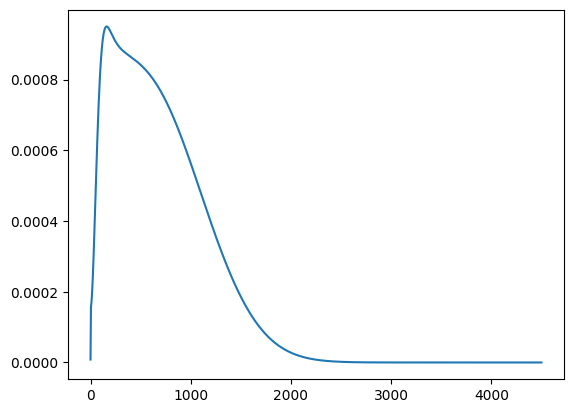

In [71]:
plt.plot(x_sample, prediction[5, :])

In [81]:
subsample_density = data["v_density"][0:-1:2, 0:-1:50].T

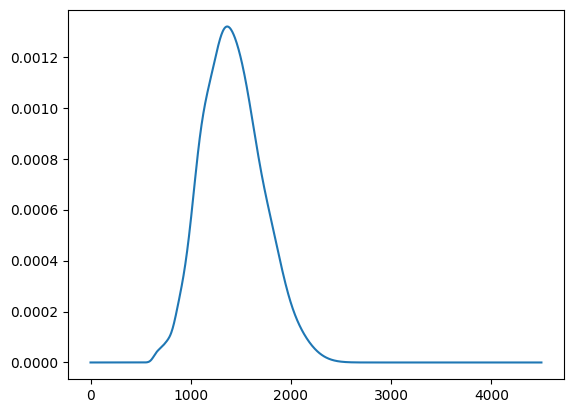

In [83]:
plt.plot(x_sample, subsample_density[5, :])

In [109]:
# relative error in L^2 from KDE benchmark
l2_rel_err = np.sum(((subsample_density-prediction)**2)*dx, 1) / np.sum((subsample_density**2)*dx, 1)

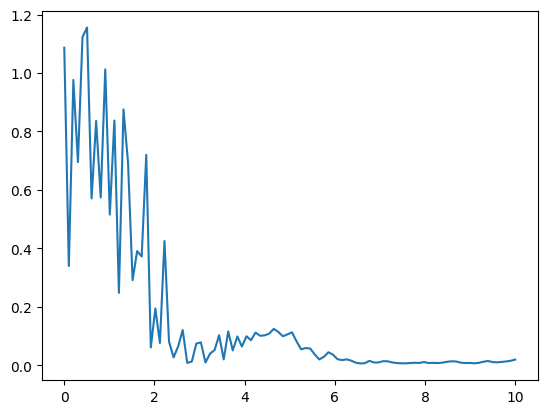

In [110]:
plt.plot(t_sample, l2_rel_err)

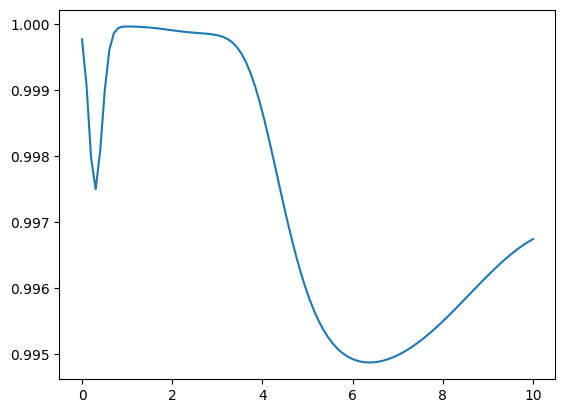

In [113]:
# test tNF mass preservation over time
mass_over_time = np.sum(prediction*dx, 1)
plt.plot(t_sample, mass_over_time)

In [116]:
np.sum((prediction<0.0))

0

In [120]:
import torch

In [125]:
test = torch.tensor(prediction)

In [129]:
test.flatten("F")

TypeError: flatten(): argument 'start_dim' (position 1) must be int, not str

In [139]:
torch.tensor([[1,2],[3,4]]).T.flatten()

tensor([1, 3, 2, 4])

In [140]:
torch.linspace(-1, 1, 10)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])

In [170]:
t1 = torch.rand(10).reshape(-1, 1)
t2 = torch.tensor([1.0]).repeat(10).reshape(-1, 1)
check = t1[0].item()
# concatenate 
test = torch.concat([t1, t2], dim=1)

In [174]:
torch.where(test[:, 0][:, None] == check, 0.2 * torch.ones_like(t1), torch.ones_like(t1))

tensor([[0.2000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [183]:
torch.logical_not(test[:, 0][:, None] == check)

tensor([[False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]])

In [187]:
hasattr(callable(lambda x: x), '__call__')

False

In [190]:
t = torch.linspace(0.0, 1.0, 10)
x = torch.linspace(-5.0, 5.0, 23)

tensor([-5.0000e+00, -4.5455e+00, -4.0909e+00, -3.6364e+00, -3.1818e+00,
        -2.7273e+00, -2.2727e+00, -1.8182e+00, -1.3636e+00, -9.0909e-01,
        -4.5455e-01,  1.4901e-07,  4.5455e-01,  9.0909e-01,  1.3636e+00,
         1.8182e+00,  2.2727e+00,  2.7273e+00,  3.1818e+00,  3.6364e+00,
         4.0909e+00,  4.5455e+00,  5.0000e+00])

In [205]:
t[1:]

tensor([0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889, 1.0000])

In [209]:
x[1:-1]

tensor([-4.5455e+00, -4.0909e+00, -3.6364e+00, -3.1818e+00, -2.7273e+00,
        -2.2727e+00, -1.8182e+00, -1.3636e+00, -9.0909e-01, -4.5455e-01,
         1.4901e-07,  4.5455e-01,  9.0909e-01,  1.3636e+00,  1.8182e+00,
         2.2727e+00,  2.7273e+00,  3.1818e+00,  3.6364e+00,  4.0909e+00,
         4.5455e+00])

In [222]:
test = torch.tensor([[1,2,3,4],[5,6,7,8],[8,9,10,11]])
test

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 8,  9, 10, 11]])

In [223]:
test2 = test.T.flatten()
test2

tensor([ 1,  5,  8,  2,  6,  9,  3,  7, 10,  4,  8, 11])

In [229]:
test2.reshape(4, 3).T

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 8,  9, 10, 11]])

In [243]:
nt = 100
nx = 500
y = torch.rand(nt, nx)
xgrid = torch.linspace(-5, 5, nx)

In [248]:
torch.sum(torch.tensor([1,2,3]))

tensor(6)